# Introduction Data Preparetion and model building (Chuẩn bị dữ liệu và mô hình hóa )
1. Load the Given Data
2. Exploratory Data Analysis
3. Segreate the Inputs and output
4. Split the data into Training and Testing Data
5. Data Prepartion - Apply Data preparation on the TRAINING DATA
6. Model Building - Buid the Model on Processd Train Data
7. Data Preparation -  Apply data preparation on the Testting Data
8. Predict =ion on Test Data - Use the trained model to predict on test data
9. evaluation -
10. 

## Step 1 - Load the Data


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:


df = pd.read_csv("C:/Users/Admin/OneDrive - ptit.edu.vn/Desktop/Iris.csv")
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Step 2 - Exploring Data Analysis
the main reason to analyse the data here is to:
1. Explore the Data Distribution of each variable and also identify outliers. (i.e. Univariate)
2. Explore the Relationships between each pair of Inputs and Output. (i.e. Bivariate)

## 2.a. Explore the Data Distribution of each Variable


array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

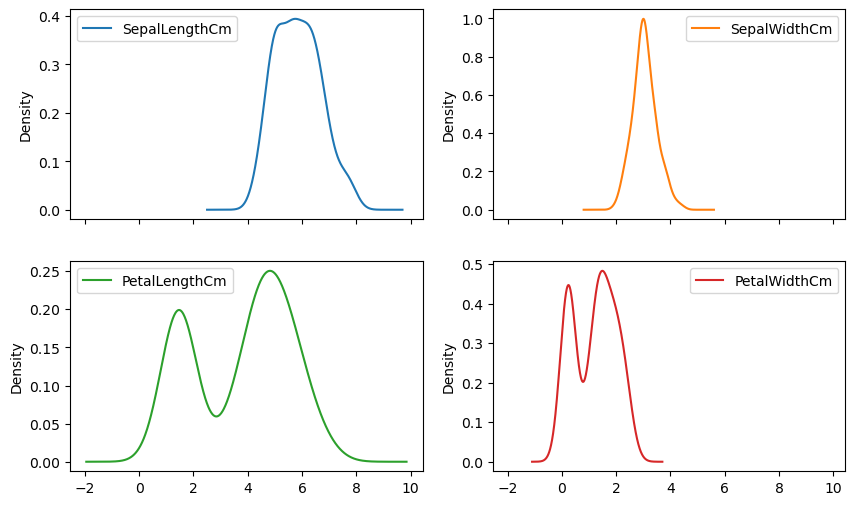

In [30]:
df.plot(kind = 'kde', subplots  = True, layout = (2, 2), figsize = (10, 6))

# subplots là chia thành các biểu đồ khác nhau thay vì viết hết vào 1 biểu đồ
# layout là chia thành 2 hàng 2 cột

## 2.b. Identifying Outliers in each Variable

SepalLengthCm       Axes(0.125,0.53;0.352273x0.35)
SepalWidthCm     Axes(0.547727,0.53;0.352273x0.35)
PetalLengthCm       Axes(0.125,0.11;0.352273x0.35)
PetalWidthCm     Axes(0.547727,0.11;0.352273x0.35)
dtype: object

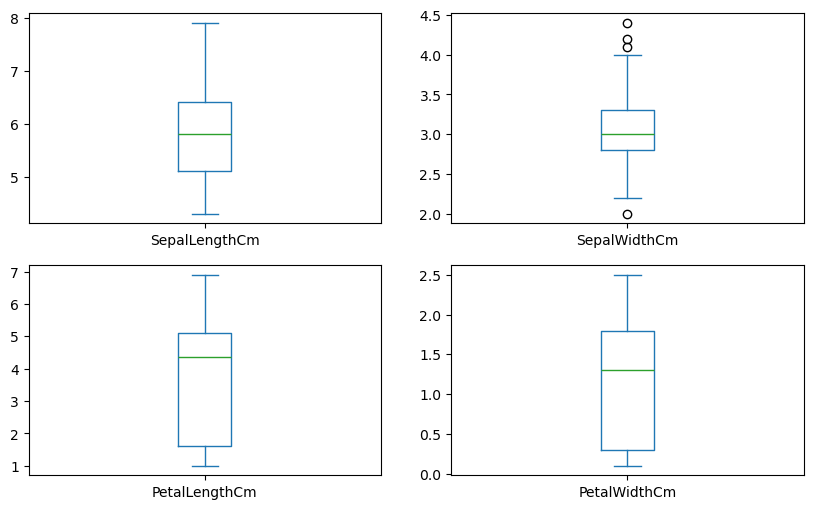

In [31]:
df.plot(kind='box', subplots=True, layout=(2, 2), figsize=(10, 6))

## 2.c. Explore the Relationship between each pair of Inputs and output

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


<Axes: title={'center': 'SepalLengthCm'}, xlabel='Species'>

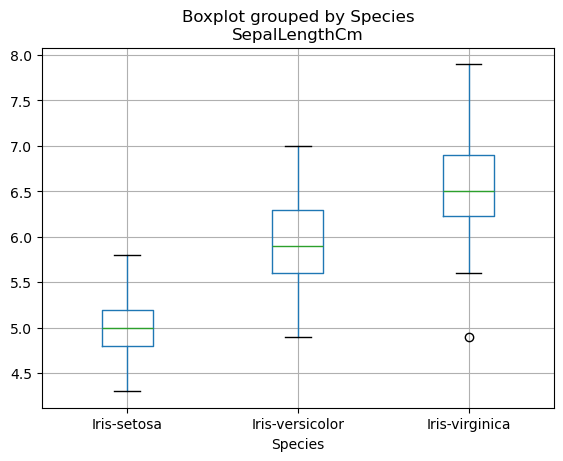

In [33]:

df.boxplot(by='Species', column='SepalLengthCm')
# vẽ boxplot cho species để đo SepalLengthCm

<Axes: title={'center': 'SepalWidthCm'}, xlabel='Species'>

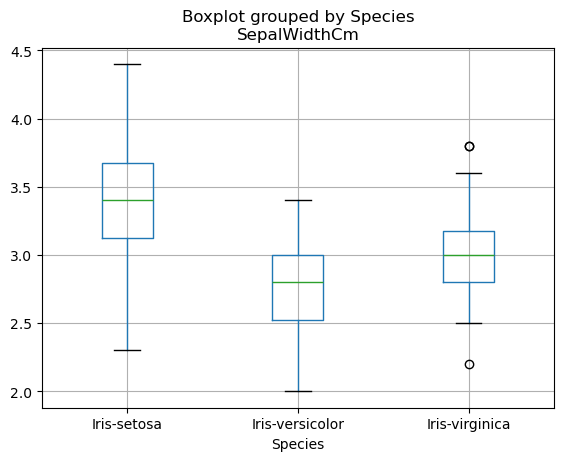

In [34]:
df.boxplot(by='Species', column='SepalWidthCm')

<Axes: title={'center': 'PetalLengthCm'}, xlabel='Species'>

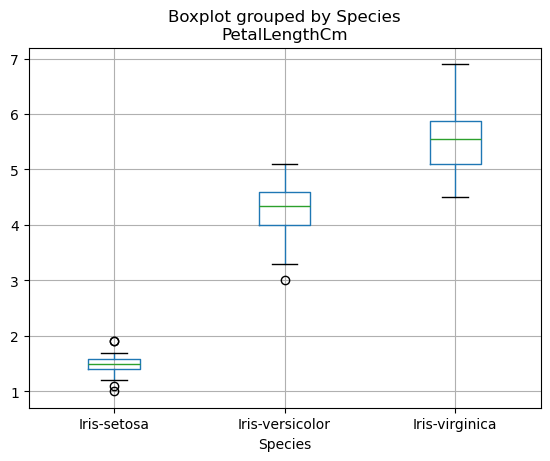

In [35]:
df.boxplot(by='Species', column='PetalLengthCm')

<Axes: title={'center': 'PetalWidthCm'}, xlabel='Species'>

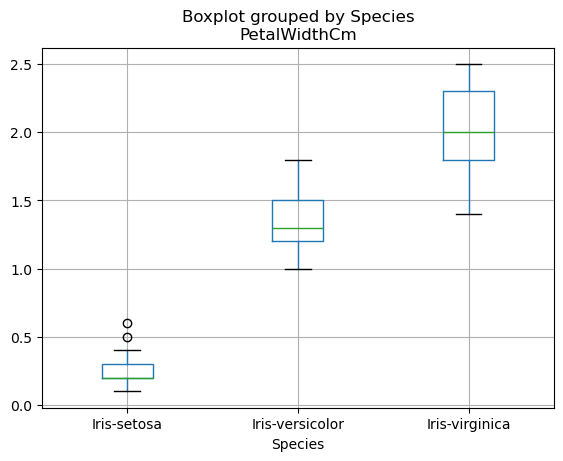

In [36]:
df.boxplot(by='Species', column='PetalWidthCm')

### Important Observation:
- It look like various Species are widely separeted based on SepalLengthCm,  PetalLengthCm and PetalWidthCm individually.
- Species have some overlaps based on SepalWidthCm

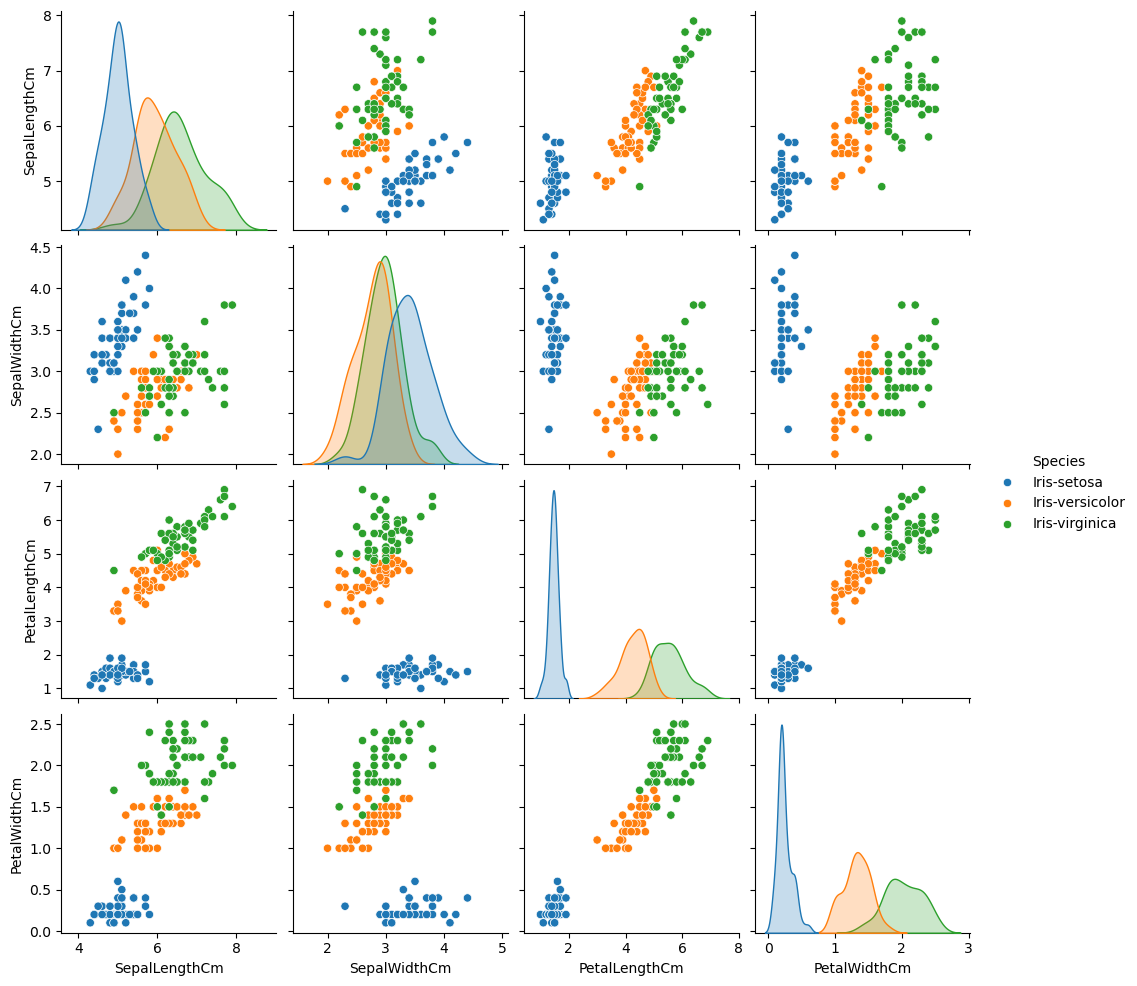

In [37]:
sns.pairplot(data = df, hue = "Species")

## Data Preparation and Model Building Pipeline
1. Segregate the Inputs (X) and Output (y)
2. Split into train and test (X_train, X_test, y_train, y_test)
3. Data Preparation: Data Cleaning and Feature Engineering.
Clean the training data
Preprocess the training data (X_train_transformed)
4. Training Phase: Build a model
5. Preprocess The test Data ( X_test_transformed)
6. predict on unseen data
7. Evaluate the model performance
8. Cách pipeline này khớp với từng bước bạn yêu cầu:

Tách X và y → X = data.drop(...), y = data['target']

Chia Train/Test → train_test_split

Làm sạch dữ liệu → SimpleImputer xử lý giá trị thiếu

Tiền xử lý dữ liệu → StandardScaler chuẩn hóa

Xây mô hình → LogisticRegression (bạn có thể thay bằng mô hình khác)

Tiền xử lý tập test + dự đoán → pipeline tự động áp dụng cùng bước cho test

Đánh giá → accuracy_score, classification_report

# Step 3 - Segregate Inputs(x) and output(y)

In [38]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
y = df['Species']

X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [40]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Step 4 - Split the data into Train and Test


In [41]:
# Split into train and Test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)
#X_train là dữ liệu đặc trưng cho tập huấn luyện
# X_test là dữ lieuj đặc trưng cho tập kiểm tra
# y_train là nhãn tương ứng với X_Train
# y_test là nhãn tương ứng với X_Test
# Test_size = 0.25 Nghĩa là 25% dữ liệu được dùng làm tập test.
#Ngược lại 75% dữ liệu dùng để train mô hình.

#Ví dụ: nếu có 100 mẫu → 75 mẫu train, 25 mẫu test.
#random_state = 0
#Giúp kết quả chia dữ liệu luôn giống nhau mỗi khi chạy lại code. giống random.seed(0)

In [16]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(112, 4) (112,)
(38, 4) (38,)


# Step 5 - apply data Preparation on Training Data
## Cleaning ( discuss later )
- Outliers
- Missing values
- Duplicates
- Multicollinearity
## Transformation / Feature Engineering biếu đổi dữ liệu và tạo đặc trưng
a) Đối với dữ liệu số (Numerical Data)

Một vấn đề thường gặp:

Các đặc trưng (features) có thang đo quá khác nhau → ảnh hưởng đến:

Thuật toán dựa trên khoảng cách (k-NN, K-Means, v.v.)

Thuật toán dựa trên gradient (Linear Regression, Logistic Regression, SVM…)
Income có giá trị hàng chục nghìn, còn Age chỉ vài chục → mô hình sẽ coi Income “nặng” hơn nhiều nếu không chuẩn hóa.

Hai cách xử lý chính:

- Normalization (Chuẩn hóa Min-Max)

Đưa giá trị về khoảng [0, 1]

Dùng cho các thuật toán dựa vào khoảng cách (k-NN, clustering…)

- Standardization (Chuẩn hóa Z-score)

Đưa dữ liệu về trung bình 0 và độ lệch chuẩn 1

Dùng cho các thuật toán giả định dữ liệu có phân phối chuẩn (Linear Regression, SVM…)

Công thức:
Chỉ fit (tính min, max, mean, std) trên tập train.

Sau đó dùng cùng thông số này để biến đổi tập test → đảm bảo tính nhất quán, tránh "data leakage".
b) Đối với dữ liệu phân loại (Categorical Data)

Máy học không hiểu trực tiếp dữ liệu dạng chữ → phải mã hóa (encoding):

One-Hot Encoding

Tạo cột nhị phân (0/1) cho từng giá trị.

Dùng cho dữ liệu nominal (không có thứ tự)
VD: "Color" {Red, Blue, Green} → IsRed, IsBlue, IsGreen

Tránh tạo quá nhiều cột nếu số lượng category quá lớn.

Label Encoding

Gán số nguyên cho từng category.

Dùng cho dữ liệu ordinal (có thứ tự)
VD: Education Level {High School:1, College:2, Master’s:3, PhD:4}

Lưu ý:

Không nên dùng Label Encoding cho dữ liệu nominal, vì mô hình có thể hiểu sai ý nghĩa thứ tự của số.

In [17]:
from sklearn.preprocessing import StandardScaler

# dùng để chuẩn hóa dữ liệu sao cho mean của mỗi cột = 0, std của mỗi cột  = 1
scaler = StandardScaler()

X_train_transformed = scaler.fit_transform(X_train)

print(X_train_transformed.shape)

(112, 4)


In [18]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 4
Mean of each column: [5.88660714 3.05178571 3.79642857 1.22232143]
Std of each column: [0.86741565 0.43424445 1.79264014 0.77916047]


In [19]:
from sklearn.preprocessing import LabelEncoder
# chuyển dữ liệu dạng phân loại Categoriacal thành số nguyên 0 , 1, 2
# label_encoder tạo 1 đối tượng LableEncoder() để hocjc cách ánh xạ từ giá trị nhãn gốc
# sang số nguyên
label_encoder = LabelEncoder()

y_train_transformed = label_encoder.fit_transform(y_train)

y_train_transformed[:5]



array([1, 1, 2, 0, 2])

In [20]:
print(label_encoder.classes_)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [42]:

y_train.head()

61     Iris-versicolor
92     Iris-versicolor
112     Iris-virginica
2          Iris-setosa
141     Iris-virginica
Name: Species, dtype: object

# Step 6 - Building the model on Processed training 
# tạo mô hình huấn luyện từ train


In [51]:
# import algorithm
from sklearn.linear_model import LogisticRegression
# logistic regression là thuật toán phân loại không phải hồi quy tuyến tính
# dùng để phân loiaj một nhãn phan loại như 0 / 1 cat.dog
# Create object
classifier = LogisticRegression()

# Train a model on training data
classifier.fit(X_train_transformed, y_train_transformed)

LogisticRegression()

# Step 7 - Apply Data Preparation on Test Data

# apply transformation on test Data


In [48]:
X_test_transformed = scaler.transform(X_test)
print(X_test_transformed.shape)

(38, 4)


In [49]:
y_test_transformed = label_encoder.transform(y_test)

print(y_test_transformed.shape)

(38,)


# Step 8 - Use the Trained Model to predict on Processed Test Data


In [52]:
# predicting on test data
# scaller là tiền xử lý dữ liệu không thể đoán trước được

y_test_pred = classifier.predict(X_test_transformed)

# vì nếu dùng train sẽ accurancy rất cao vì nó thấy trước dữ liệu rồi
# tôi cần một điểm test để xem mô hình train sẽ đi tới đâu

In [26]:
print("THanh tan")


THanh tan


## Step 9 - Evaluation of Model's Performnace

In [46]:
from sklearn.metrics import accuracy_score


# nhãn thực tế
y_true = [0, 1, 2, 2, 0]

# nhãn mô hình dự đoán
y_pred = [0, 0, 2,  2, 0]

print("Accuracy: ", accuracy_score(y_true, y_pred))
# đơn giản vì y_pred dự đoán đúng 4 vị trí thì là 4 / 5 * 100 = 80%

Accuracy:  0.8


In [53]:
# import metrics from sklean
from sklearn import metrics

metrics.accuracy_score(y_test_transformed, y_test_pred)

0.9736842105263158